In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[]

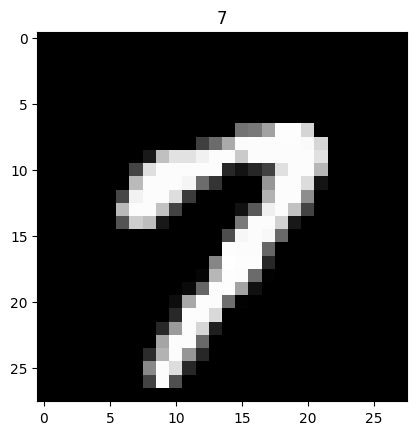

In [ ]:
plt.title(y_train[15])
plt.imshow(x_train[15], cmap='gray')
plt.plot()

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])



In [ ]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2359552   
                                                      

In [ ]:
model.fit(
    x_train, y_train,
    batch_size=30, epochs=2,
    validation_data=(x_test, y_test)
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss : {score[0]}")
print(f"Test accuracy : {score[1]}")

In [ ]:
model.save("model.h5")

In [ ]:
def predict(img):
    img = img.reshape(1, 28, 28, 1)
    res = np.argmax(model.predict(img), axis=-1)
    return res

In [ ]:
print(predict(x_test[45]))

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


f = open('model.tflite', "wb")
f.write(tflite_model)
f.close()

In [ ]:

try:
  from google.colab import files
  files.download('mnist.tflite')
except ImportError:
  import os
  print('TF Lite model:', os.path.join(os.getcwd(), 'mnist.tflite'))

In [ ]:

zero_img_path = keras.utils.get_file(
    'zero.png',
    'https://storage.googleapis.com/khanhlvg-public.appspot.com/digit-classifier/zero.png'
)
image = keras.preprocessing.image.load_img(
    zero_img_path,
    color_mode = 'grayscale',
    target_size=(28, 28),
    interpolation='bilinear'
)


input_image = np.expand_dims(np.array(image, dtype=np.float32) / 255.0, 0)


show_sample(input_image, ['Input Image'], 1)

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
interpreter.set_tensor(interpreter.get_input_details()[0]["index"], input_image)
interpreter.invoke()
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])()[0]

digit = np.argmax(output)
print('Predicted Digit: %d\nConfidence: %f' % (digit, output[digit]))